# Kelompok 5

FIKRY IDHAM DWIYANA (2101294)

RATU SYAHIRAH KHAIRUNNISA (2200978)

ADRIAN MULIANTO (2200939)

TALITHA FAYARINA ADHIGUNAWAN (2201271)

WILDAN HAFIZH RAFFIANSHAR (2202301)


## Praproses Data

1. Memperbaiki nama atribut di tiap dataframe
- mengubah nama atribut menjadi lowercase
- mengubah " " dan "." menjadi "_"

2. Melakukan drop pada atribut
- atribut dengan data 0 semua di drop karena datanya hanya berisi 0


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Load Dataset

In [2]:
# Baca data dari 5 file Excel
file_paths = ['Data Bencana Banjir.xlsx', 'Data Bencana Kebakaran.xlsx', 'Data Bencana Longsor.xlsx', 'Data Bencana Puting Beliung.xlsx',\
                'Data Bencana Abrasi.xlsx', 'Data Bencana Gempa Bumi.xlsx', 'Data Bencana Tsunami.xlsx', 'Data Bencana Gunung Meletus.xlsx', 'Data Bencana Gempa dan Tsunami.xlsx']
dfs = [pd.read_excel(file, header=1) for file in file_paths]

Menambahkan Kolom Bencana untuk Mengidentifikasi Jenis Bencana

In [3]:
# Tambahkan kolom 'Bencana' ke masing-masing DataFrame untuk mengidentifikasi jenis bencana
for i, df in enumerate(dfs):
    df['Bencana'] = file_paths[i].replace('Data Bencana ', '').replace('.xlsx', '')

Menyatukan Data Set menjadi Data Frame

In [4]:
# Gabungkan data menjadi satu DataFrame
combined_data = pd.concat(dfs)
combined_data

,Unnamed: 0,Laki-laki,Perempuan,Jumlah (L+P),Unnamed: 4,Meninggal,Hilang,Terluka,Menderita,Mengungsi,...,Rumah,Fasilitas Pendidikan,Fasilitas Kesehatan,Fasilitas Peribadatan,Fasilitas Umum,Perkantoran,Jembatan,Pabrik,Kios,Bencana
0,11. Aceh,773,163,104,608,1530386,999341,2530602,53634,725,...,288,0,78,447,0,84,NaN,NaN,NaN,Banjir
1,12. Sumatera Utara,688,365,177,12668,1041982,277730,1332922,26790,987,...,102,9,15,104,1,77,NaN,NaN,NaN,Banjir
2,13. Sumatera Barat,489,129,24,133,197549,141489,339324,12965,169,...,130,0,20,299,0,489,NaN,NaN,NaN,Banjir
3,14. Riau,221,54,1,5789,739558,145498,890900,30584,829,...,547,0,7,144,0,0,NaN,NaN,NaN,Banjir
4,15. Jambi,292,31,12,881,439958,92387,533269,12081,541,...,110,0,29,40,0,1,NaN,NaN,NaN,Banjir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,11. Aceh,21,128728,37063,2830,0,518450,687071,179312,1226,...,2742,0,1638,1257,0,0,NaN,NaN,NaN,Gempa dan Tsunami
1,12. Sumatera Utara,1,130,24,1832,0,4012,5998,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Gempa dan Tsunami
2,18. Lampung,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Gempa dan Tsunami
3,72. Sulawesi Tengah,4,3673,667,4438,0,172635,181413,99726,1299,...,327,0,78,7,0,362,NaN,NaN,NaN,Gempa dan Tsunami


Mengganti nama menjadi lower case dan nama data yang memiliki spasi di ganti menajdi _ (under score)

In [5]:
# menggati nama menjadi lower case dan nama data yang memiliki spasi di ganti menajdi _ (under score)
combined_data= combined_data.rename(columns=str.lower)
combined_data.columns = combined_data.columns.str.replace(' ', '_')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 4
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unnamed:_0             227 non-null    object 
 1   laki-laki              227 non-null    int64  
 2   perempuan              227 non-null    int64  
 3   jumlah_(l+p)           227 non-null    int64  
 4   unnamed:_4             227 non-null    int64  
 5   meninggal              227 non-null    int64  
 6   hilang                 227 non-null    int64  
 7   terluka                227 non-null    int64  
 8   menderita              227 non-null    int64  
 9   mengungsi              227 non-null    int64  
 10  jumlah                 227 non-null    int64  
 11  rumah                  227 non-null    int64  
 12  fasilitas_pendidikan   227 non-null    int64  
 13  fasilitas_kesehatan    227 non-null    int64  
 14  fasilitas_peribadatan  227 non-null    int64  
 15  fasilita

Mengganti nama provinsi dan nama jumlah bencana yang tidak terbaca

In [6]:
# mengganti nama provinsi dan nama jumlah bencana yang tidak terbaca
combined_data.columns = combined_data.columns.str.replace('unnamed:_0', 'provinsi')
combined_data.columns = combined_data.columns.str.replace('unnamed:_4', "jumlah_bencana")
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 4
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   provinsi               227 non-null    object 
 1   laki-laki              227 non-null    int64  
 2   perempuan              227 non-null    int64  
 3   jumlah_(l+p)           227 non-null    int64  
 4   jumlah_bencana         227 non-null    int64  
 5   meninggal              227 non-null    int64  
 6   hilang                 227 non-null    int64  
 7   terluka                227 non-null    int64  
 8   menderita              227 non-null    int64  
 9   mengungsi              227 non-null    int64  
 10  jumlah                 227 non-null    int64  
 11  rumah                  227 non-null    int64  
 12  fasilitas_pendidikan   227 non-null    int64  
 13  fasilitas_kesehatan    227 non-null    int64  
 14  fasilitas_peribadatan  227 non-null    int64  
 15  fasilita

Mengecek apakah Null atau Tidak

In [7]:
# Mengecek apakah Null atau Tidak
combined_data.isna().sum()

provinsi                   0
laki-laki                  0
perempuan                  0
jumlah_(l+p)               0
jumlah_bencana             0
meninggal                  0
hilang                     0
terluka                    0
menderita                  0
mengungsi                  0
jumlah                     0
rumah                      0
fasilitas_pendidikan       0
fasilitas_kesehatan        0
fasilitas_peribadatan      0
fasilitas_umum             0
perkantoran                0
jembatan                 227
pabrik                   227
kios                     227
bencana                    0
dtype: int64

Mendrop data yang tidak diperlukan

In [8]:
# mendrop data yang tidak diperlukan
combined_data = combined_data.drop(['laki-laki','perempuan', 'jumlah_(l+p)', 'jumlah', 'jembatan','pabrik', 'kios'], axis=1)
combined_data.info()
# bagian laki-laki, perempuan dan jumlahnya dihilangkan karena kami berasumsi, nilai tersebut tidak sesuai dengan kenyataan
# bagian jembatan, pabrik, kios dihilangkan karena isinya hanya 0 (NULL)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 4
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   provinsi               227 non-null    object
 1   jumlah_bencana         227 non-null    int64 
 2   meninggal              227 non-null    int64 
 3   hilang                 227 non-null    int64 
 4   terluka                227 non-null    int64 
 5   menderita              227 non-null    int64 
 6   mengungsi              227 non-null    int64 
 7   rumah                  227 non-null    int64 
 8   fasilitas_pendidikan   227 non-null    int64 
 9   fasilitas_kesehatan    227 non-null    int64 
 10  fasilitas_peribadatan  227 non-null    int64 
 11  fasilitas_umum         227 non-null    int64 
 12  perkantoran            227 non-null    int64 
 13  bencana                227 non-null    object
dtypes: int64(12), object(2)
memory usage: 26.6+ KB


Mengecek kembali nilai NULL

In [9]:
# mengecek kembali nilai NULL
combined_data.isna().sum()

provinsi                 0
jumlah_bencana           0
meninggal                0
hilang                   0
terluka                  0
menderita                0
mengungsi                0
rumah                    0
fasilitas_pendidikan     0
fasilitas_kesehatan      0
fasilitas_peribadatan    0
fasilitas_umum           0
perkantoran              0
bencana                  0
dtype: int64

Menghapus bagian baris jumlah di kolom provinsi dikarenakan bukan nama provinsi

In [10]:
# Menghapus bagian baris jumlah di kolom provinsi
combined_data = combined_data[combined_data['provinsi'] != 'Jumlah']

Menampilkan data setelah praproses

In [11]:
combined_data

,provinsi,jumlah_bencana,meninggal,hilang,terluka,menderita,mengungsi,rumah,fasilitas_pendidikan,fasilitas_kesehatan,fasilitas_peribadatan,fasilitas_umum,perkantoran,bencana
0,11. Aceh,608,1530386,999341,2530602,53634,725,288,0,78,447,0,84,Banjir
1,12. Sumatera Utara,12668,1041982,277730,1332922,26790,987,102,9,15,104,1,77,Banjir
2,13. Sumatera Barat,133,197549,141489,339324,12965,169,130,0,20,299,0,489,Banjir
3,14. Riau,5789,739558,145498,890900,30584,829,547,0,7,144,0,0,Banjir
4,15. Jambi,881,439958,92387,533269,12081,541,110,0,29,40,0,1,Banjir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,11. Aceh,2830,0,518450,687071,179312,1226,2742,0,1638,1257,0,0,Gempa dan Tsunami
1,12. Sumatera Utara,1832,0,4012,5998,0,0,0,0,0,0,0,0,Gempa dan Tsunami
2,18. Lampung,0,0,0,0,0,0,0,0,0,0,0,0,Gempa dan Tsunami
3,72. Sulawesi Tengah,4438,0,172635,181413,99726,1299,327,0,78,7,0,362,Gempa dan Tsunami


Membuat BarPlot Menampilkan Jumlah Korban per Provinsi dari Berbagai Bencana dengan :

Sumbu X Provinsi

Sumbu Y Jumlah Korban Meninggal

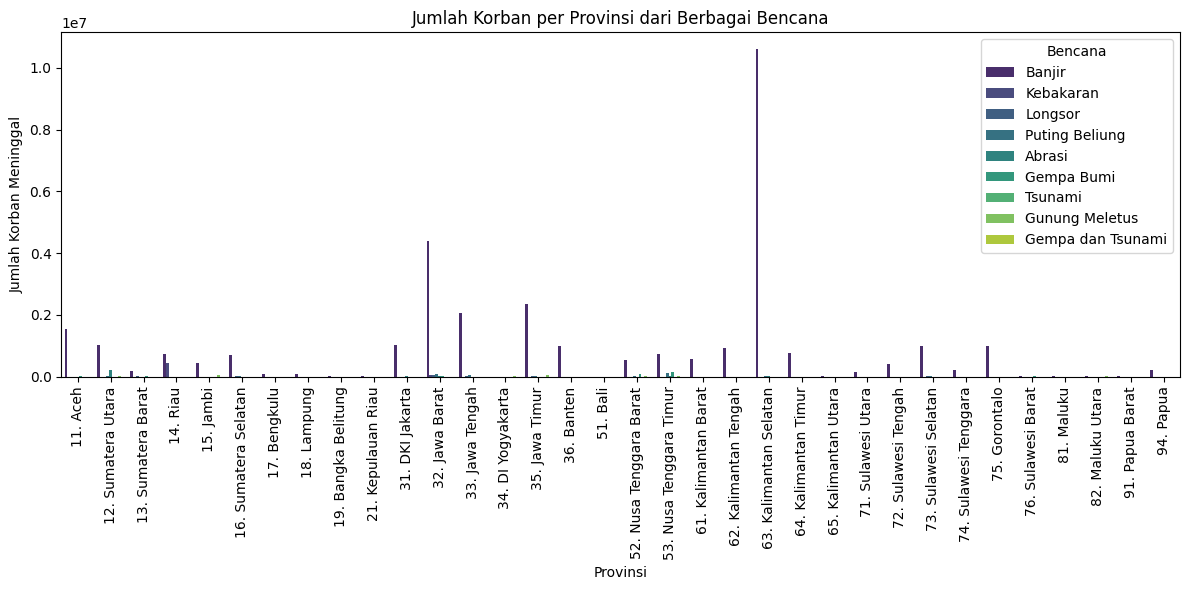

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_data, x='provinsi', y='meninggal', hue='bencana', palette='viridis')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Korban Meninggal')
plt.title('Jumlah Korban Meninggal per Provinsi dari Berbagai Bencana')
plt.xticks(rotation=90)
plt.legend(title='Bencana', loc='upper right')
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari data diatas menampilkan jumlah korban meninggal dari berbagai bencana di setiap provinsi.

Dapat dilihat bahwa korban bencana banjir di Provinsi Kalimantan Selatan jauh lebih tinggi dari yang lain

Text(0.5, 1.0, 'Jumlah Korban Menderita di Pulau Jawa dari Berbagai Bencana')

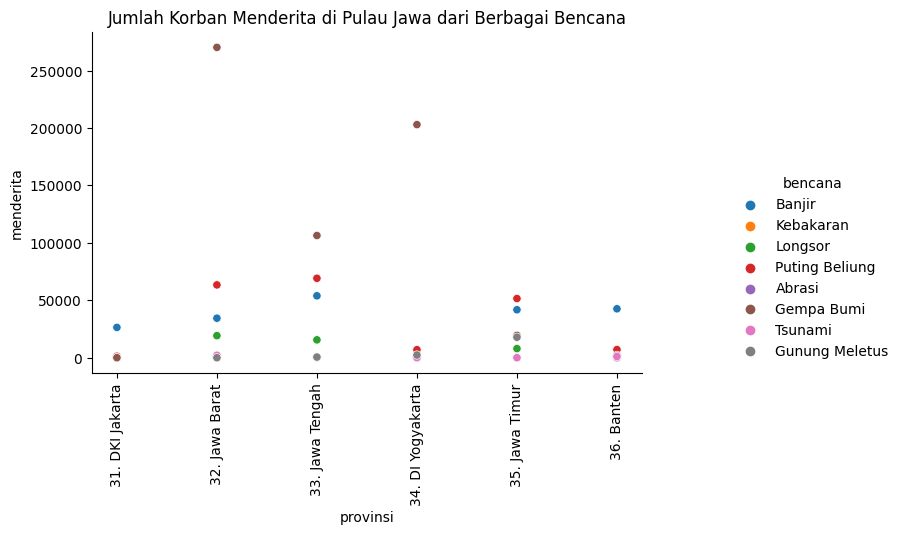

In [110]:
# Filter data hanya untuk provinsi Jawa Barat dan Jawa Tengah
jawa = ['32. Jawa Barat', '33. Jawa Tengah', '31. DKI Jakarta', '34. DI Yogyakarta', '35. Jawa Timur', '36. Banten']
filtered_data = combined_data[combined_data['provinsi'].isin(jawa)]

# Plot data yang sudah difilter
c = sns.relplot(x="provinsi", y="menderita", hue="bencana", data=filtered_data)
c.fig.set_size_inches(10, 4)
plt.xticks(rotation=90)
plt.title('Jumlah Korban Menderita di Pulau Jawa dari Berbagai Bencana')

Plot diatas menunjukan pembagian korban menderita akibat bencana di pulau Jawa, dari provinsi diatas banjir hampir ada di setiap provinsi

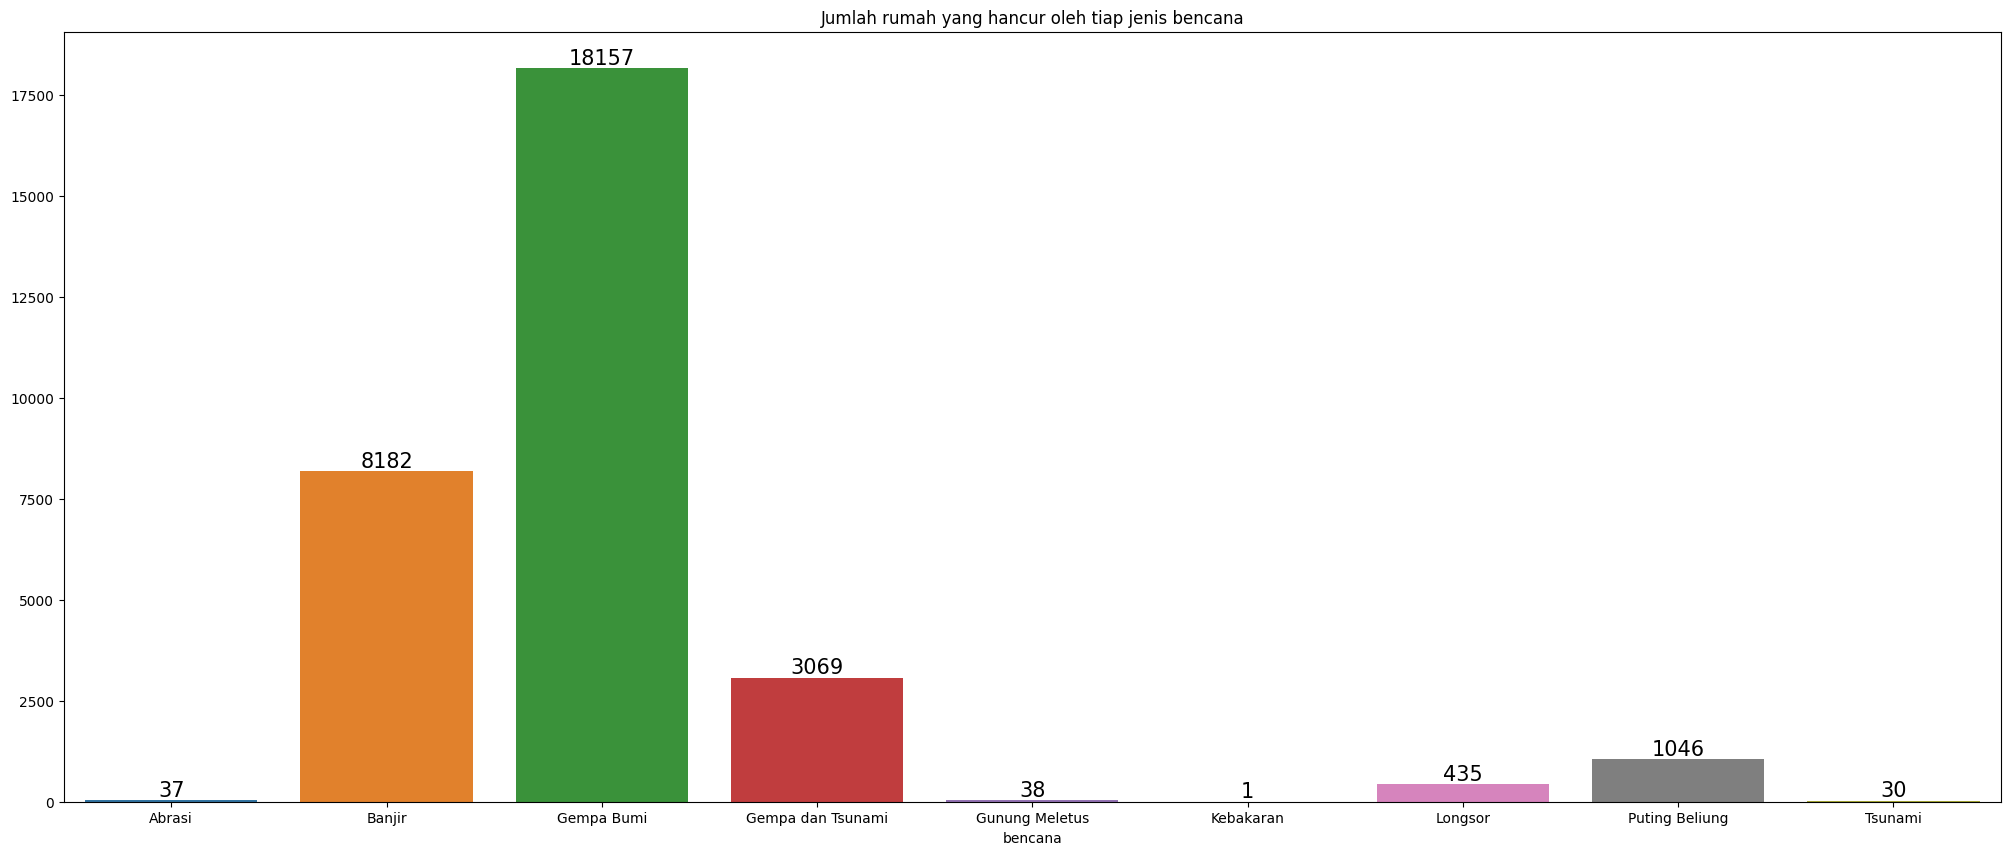

In [105]:
# Set ukuran figure
plt.figure(figsize=(25, 10))

# Set judul plot
plt.title("Jumlah rumah yang hancur oleh tiap jenis bencana")

# Menghitung total bencana untuk setiap kategori pada sumbu x
total_bencana = combined_data.groupby('bencana')['rumah'].sum()

# Membuat plot dengan sns.countplot()
sns.barplot(x=total_bencana.index, y=total_bencana.values)

# Menambahkan label total bencana di atas setiap bar
for i, count in enumerate(total_bencana.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=15)

# Menampilkan plot
# plt.xticks(rotation=90)  # Rotasi label pada sumbu x agar mudah dibaca
plt.show()

Plot di atas menunjukan total bencana untuk setiap jenis bencana dengan data paling tinggi yaitu pada bencana Gempa Bumi.

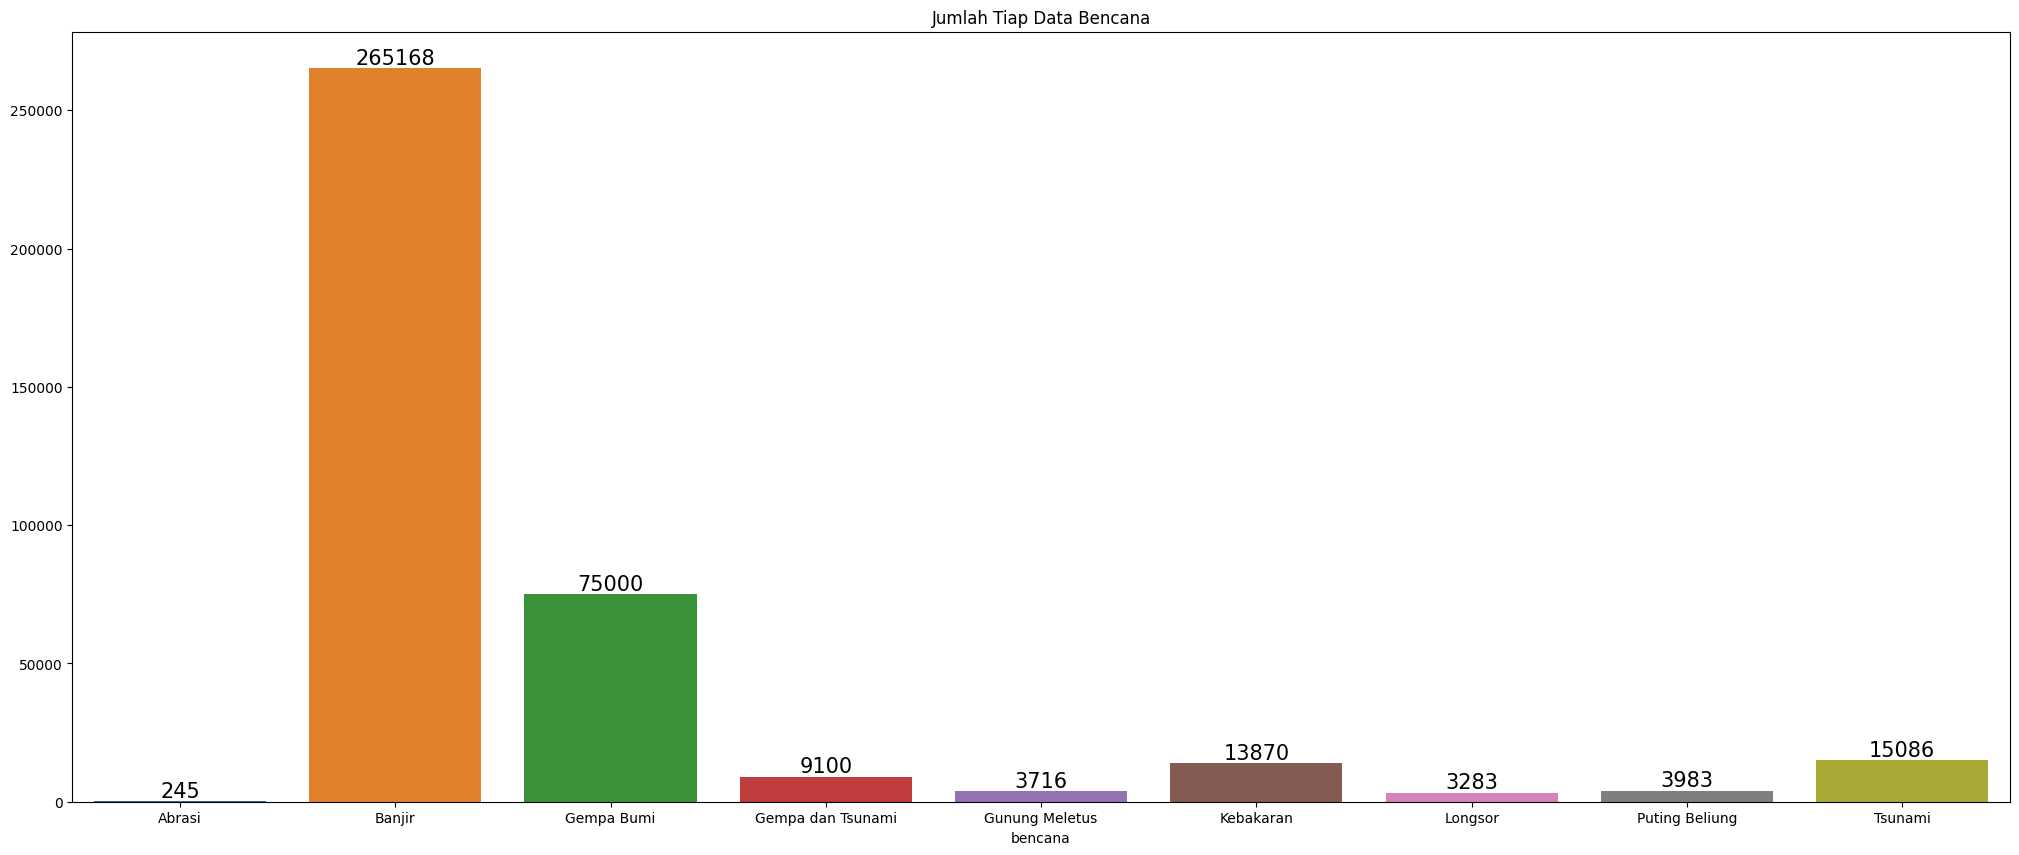

In [16]:
# Set ukuran figure
plt.figure(figsize=(25, 10))

# Set judul plot
plt.title("Jumlah Tiap Data Bencana")

# Menghitung total bencana untuk setiap kategori pada sumbu x
total_bencana = combined_data.groupby('bencana')['jumlah_bencana'].sum()

# Membuat plot dengan sns.countplot()
sns.barplot(x=total_bencana.index, y=total_bencana.values)

# Menambahkan label total bencana di atas setiap bar
for i, count in enumerate(total_bencana.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=15)

# Menampilkan plot
# plt.xticks(rotation=90)  # Rotasi label pada sumbu x agar mudah dibaca
plt.show()

dari barplot di atas kita bisa melihat data total keseluruhan bencana dari data yang ada dan bencana yang paling banyak terjadi yaitu dengan total 265.168 bencana banjir terjadi.

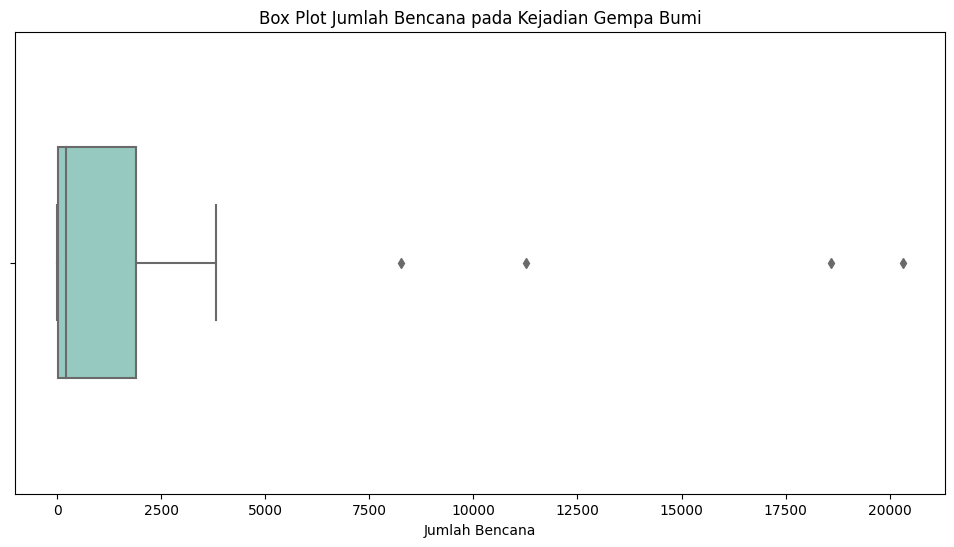

In [60]:
data_gempa = combined_data[combined_data['bencana'] == "Gempa Bumi"]

#Set ukuran figure
plt.figure(figsize=(12, 6))

# Membuat boxplot dengan seaborn
sns.boxplot(x="jumlah_bencana", data=data_gempa, width=0.5, orient="h", palette="Set3")

# Mengatur label dan judul plot
plt.xlabel("Jumlah Bencana")
plt.title("Box Plot Jumlah Bencana pada Kejadian Gempa Bumi")

# Menampilkan plot
plt.show()

dari barplot di atas berisi boxplot dari keseluruhan jumlah bencana pada kejadian gempa bumi 

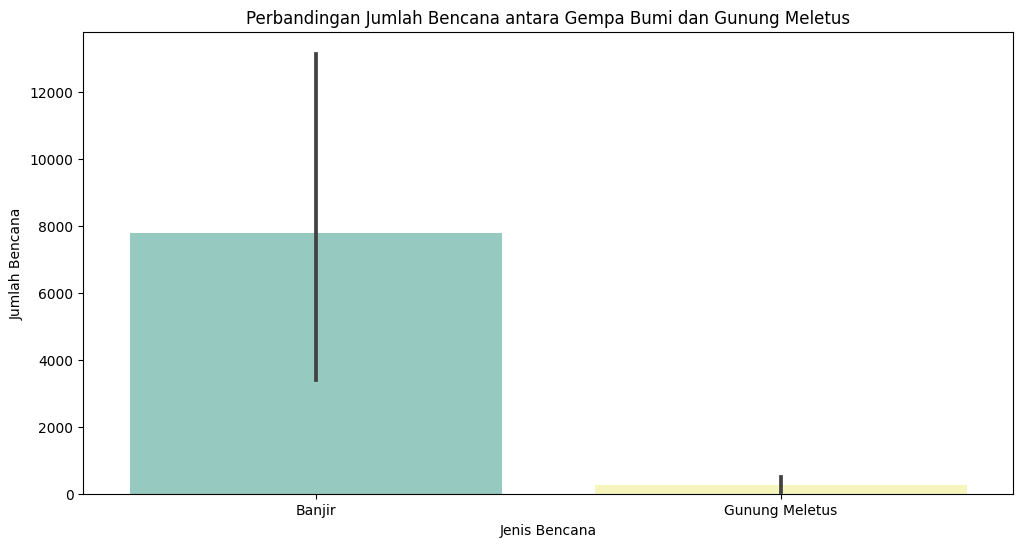

In [113]:
data_banjir = combined_data[combined_data['bencana'] == "Banjir"]
data_gunung_meletus = combined_data[combined_data['bencana'] == "Gunung Meletus"]

# Set ukuran figure
plt.figure(figsize=(12, 6))

# Membuat bar plot dengan seaborn
sns.barplot(x="bencana", y="jumlah_bencana", data=pd.concat([data_banjir, data_gunung_meletus]), palette="Set3")

# Mengatur label dan judul plot
plt.xlabel("Jenis Bencana")
plt.ylabel("Jumlah Bencana")
plt.title("Perbandingan Jumlah Bencana antara Gempa Bumi dan Gunung Meletus")

# Menampilkan plot
plt.show()

barplot di atas menunjukan perbandingan jumlah bencana antara banjir dan gunung meletus

dari bar plot di atas menunjukan perbandingan jumlah bencana gempa bumi dan gunung meletus

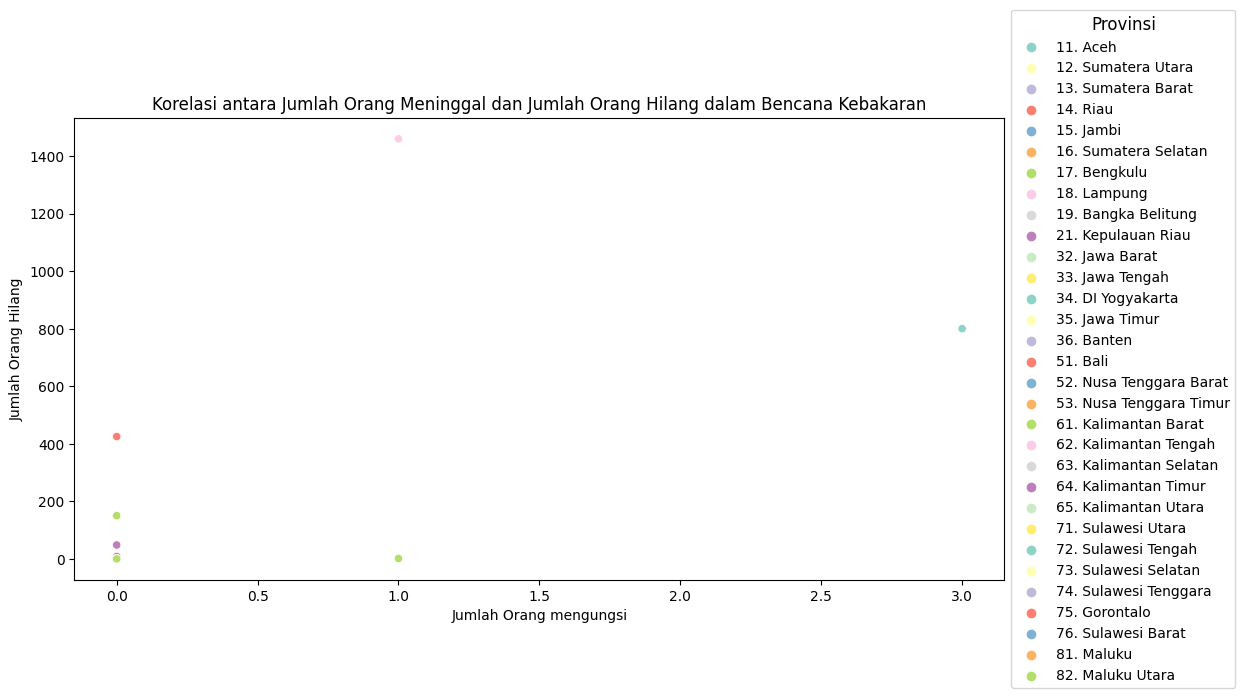

In [104]:
data_kebakaran = combined_data[combined_data['bencana'] == "Kebakaran"]

# Set ukuran figure
plt.figure(figsize=(12, 6))

# Membuat scatter plot dengan seaborn
sns.scatterplot(x="mengungsi", y="hilang", hue="provinsi", data=data_kebakaran, palette="Set3")

# Mengatur label dan judul plot
plt.xlabel("Jumlah Orang mengungsi")
plt.ylabel("Jumlah Orang Hilang")
plt.title("Korelasi antara Jumlah Orang Meninggal dan Jumlah Orang Hilang dalam Bencana Kebakaran")

# Menambahkan legenda ke pinggir
plt.legend(title="Provinsi", title_fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# Menampilkan plot
plt.show()

In [36]:
Data_BaruGT = combined_data[combined_data['bencana'] == 'Gempa dan Tsunami']
Data_BaruGT

,provinsi,jumlah_bencana,meninggal,hilang,terluka,menderita,mengungsi,rumah,fasilitas_pendidikan,fasilitas_kesehatan,fasilitas_peribadatan,fasilitas_umum,perkantoran,bencana
0,11. Aceh,2830,0,518450,687071,179312,1226,2742,0,1638,1257,0,0,Gempa dan Tsunami
1,12. Sumatera Utara,1832,0,4012,5998,0,0,0,0,0,0,0,0,Gempa dan Tsunami
2,18. Lampung,0,0,0,0,0,0,0,0,0,0,0,0,Gempa dan Tsunami
3,72. Sulawesi Tengah,4438,0,172635,181413,99726,1299,327,0,78,7,0,362,Gempa dan Tsunami
4,76. Sulawesi Barat,0,0,8731,8732,0,0,0,0,0,0,0,0,Gempa dan Tsunami


Membuat Tabel Data Baru untuk memperlihatkan dari keseluruhan data hanya data dengan bencana Gempa dan Tsunami.

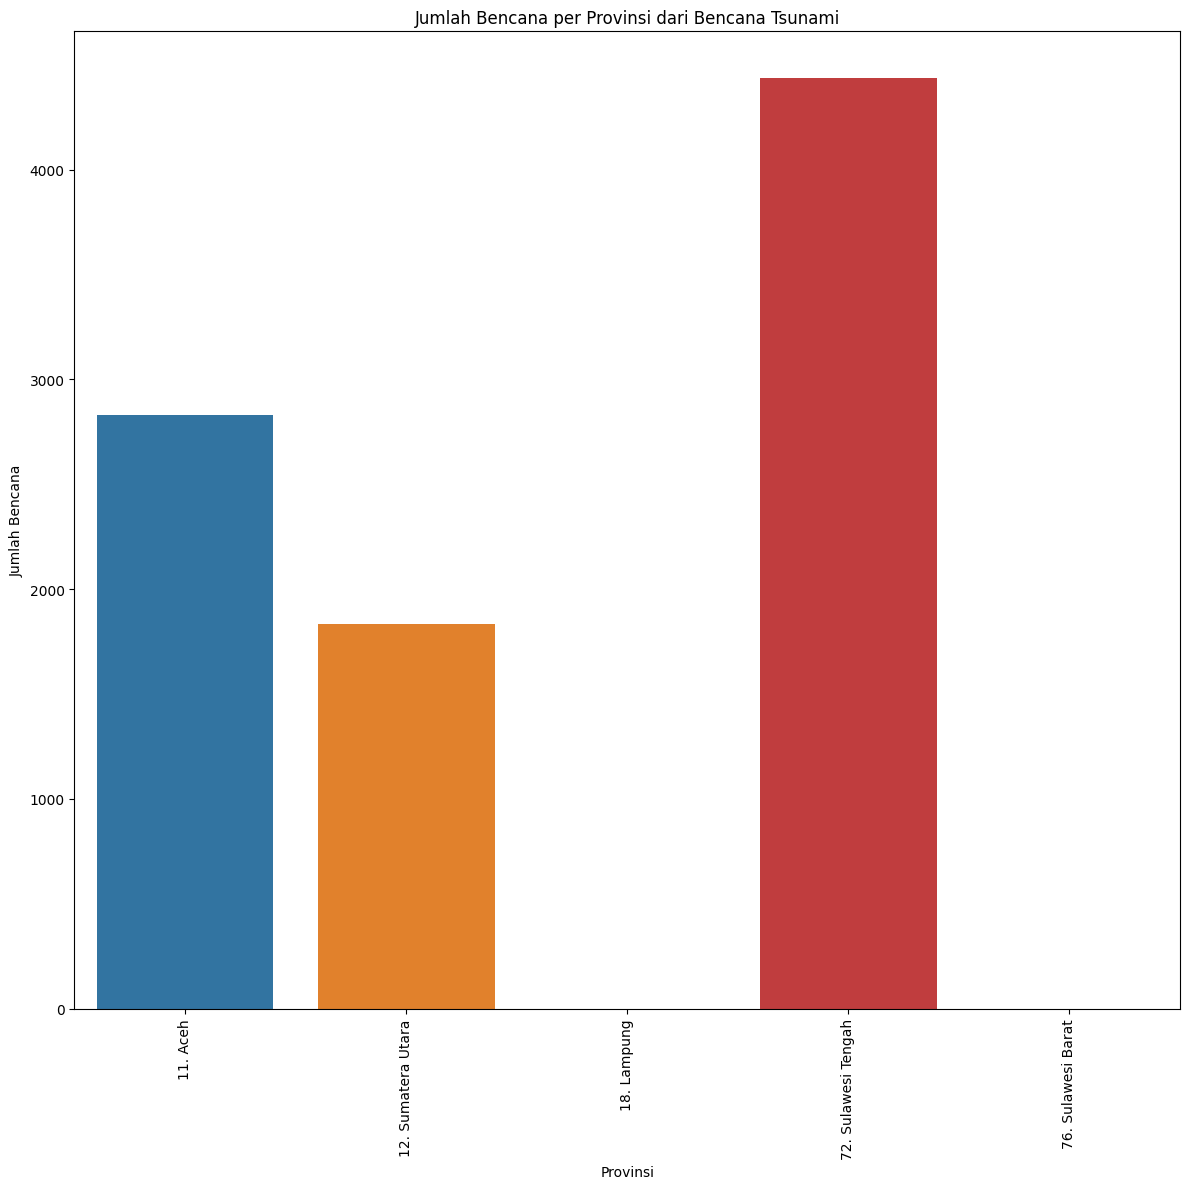

In [53]:
# Filter data hanya untuk bencana 'Banjir'
GempaTsunami_data = combined_data[combined_data['bencana'] == 'Gempa dan Tsunami']

plt.figure(figsize=(12, 12))
sns.barplot(data=GempaTsunami_data, x='provinsi', y='jumlah_bencana')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Bencana')
plt.title('Jumlah Bencana per Provinsi dari Bencana Tsunami')
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()

Untuk memperlihatkan jumlah bencana yang dimiliki setiap provinsi

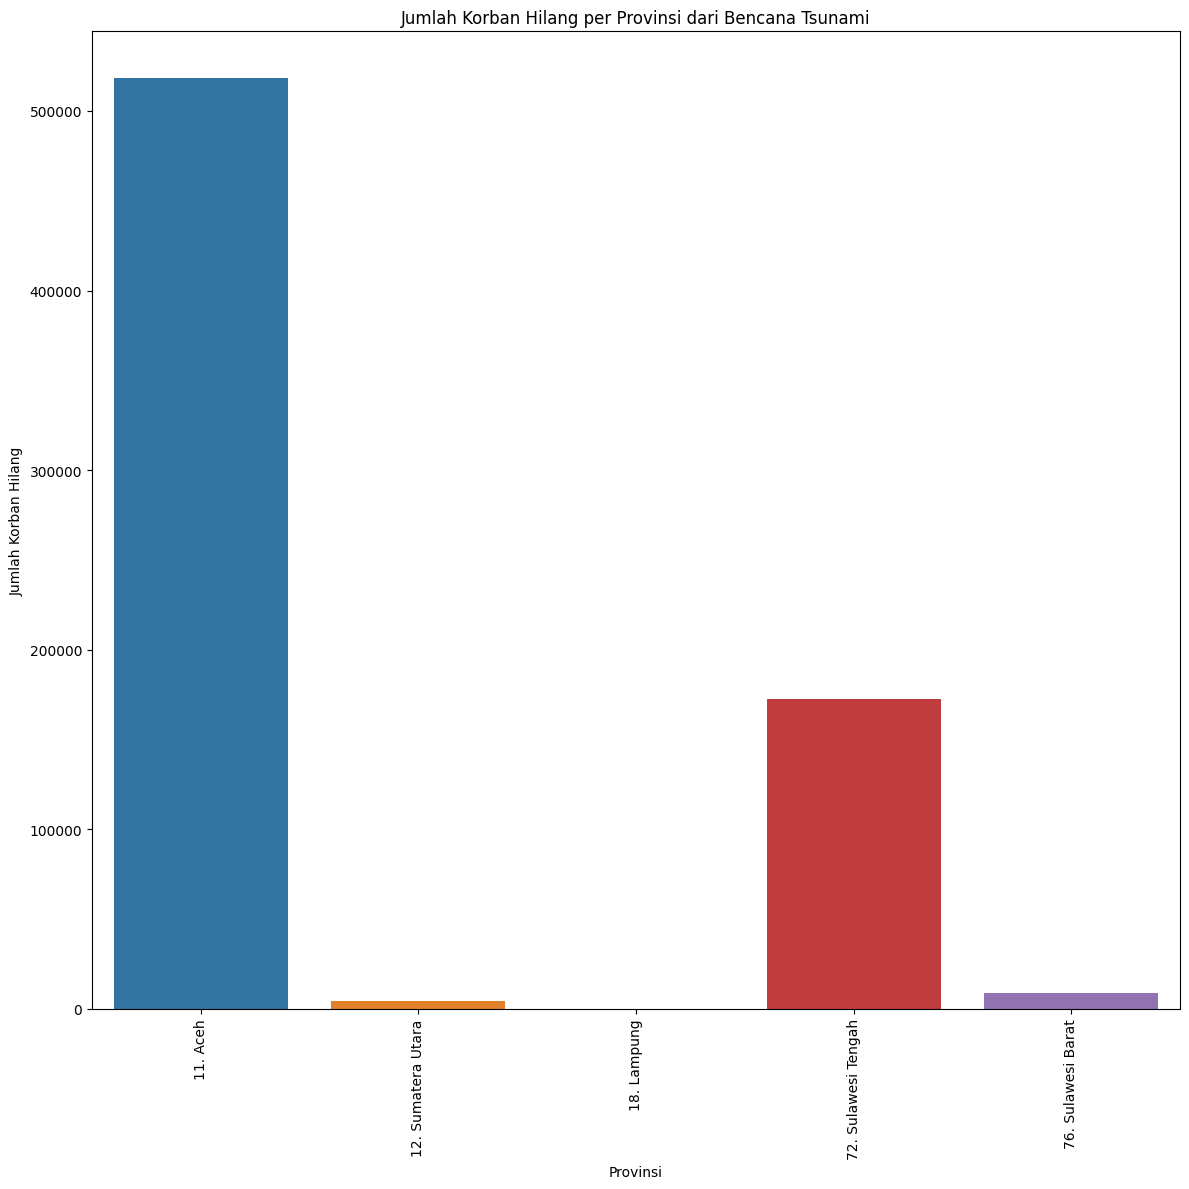

In [48]:
# Filter data hanya untuk bencana 'Banjir'
GempaTsunami_data = combined_data[combined_data['bencana'] == 'Gempa dan Tsunami']

plt.figure(figsize=(12, 12))
sns.barplot(data=GempaTsunami_data, x='provinsi', y='hilang')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Korban Hilang')
plt.title('Jumlah Korban Hilang per Provinsi dari Bencana Tsunami')
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()

Memperlihatkan Korelasi antara banyaknya bencana yang terjadi dan korban hilang

In [108]:
# Filter data hanya untuk bencana 'Gempa dan Tsunami' dan provinsi 'Aceh'
GempaTsunami_Aceh_data = combined_data[(combined_data['bencana'] == 'Gempa dan Tsunami') & (combined_data['provinsi'] == 'Aceh')]

# Set ukuran figure
plt.figure(figsize=(12, 12))

# Membuat bar plot dengan seaborn
sns.barplot(x="jumlah_bencana", y="hilang", data=GempaTsunami_Aceh_data, palette="Set3")

# Mengatur label dan judul plot
plt.xlabel("Jumlah Bencana")
plt.ylabel("Korban Hilang")
plt.title("Perbandingan Jumlah Bencana dan Korban Hilang di Aceh (Gempa dan Tsunami)")

# Menampilkan plot
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 1200x1200 with 0 Axes>

In [40]:
Data_BaruPB = combined_data[combined_data['bencana'] == 'Puting Beliung']
Data_BaruPB

,provinsi,jumlah_bencana,meninggal,hilang,terluka,menderita,mengungsi,rumah,fasilitas_pendidikan,fasilitas_kesehatan,fasilitas_peribadatan,fasilitas_umum,perkantoran,bencana
0,11. Aceh,129,5448,4909,10499,5267,71,25,0,27,2,0,138,Puting Beliung
1,12. Sumatera Utara,158,14145,1965,16278,16800,34,44,12,16,2,0,15,Puting Beliung
2,13. Sumatera Barat,54,3852,734,4646,2778,25,19,0,15,44,0,25,Puting Beliung
3,14. Riau,55,6353,865,7282,2664,29,16,0,17,0,0,19,Puting Beliung
4,15. Jambi,18,1798,64,1884,3129,15,11,0,6,2,0,7,Puting Beliung
5,16. Sumatera Selatan,61,16384,1137,17590,8412,41,15,9,23,3,0,10,Puting Beliung
6,17. Bengkulu,3,303,0,311,313,2,0,0,3,1,0,0,Puting Beliung
7,18. Lampung,77,6667,374,7126,8884,39,10,0,7,2,0,77,Puting Beliung
8,19. Bangka Belitung,6,2598,228,2837,2002,9,3,12,5,0,0,59,Puting Beliung
9,21. Kepulauan Riau,117,1216,956,2292,1444,3,3,0,4,1,0,28,Puting Beliung


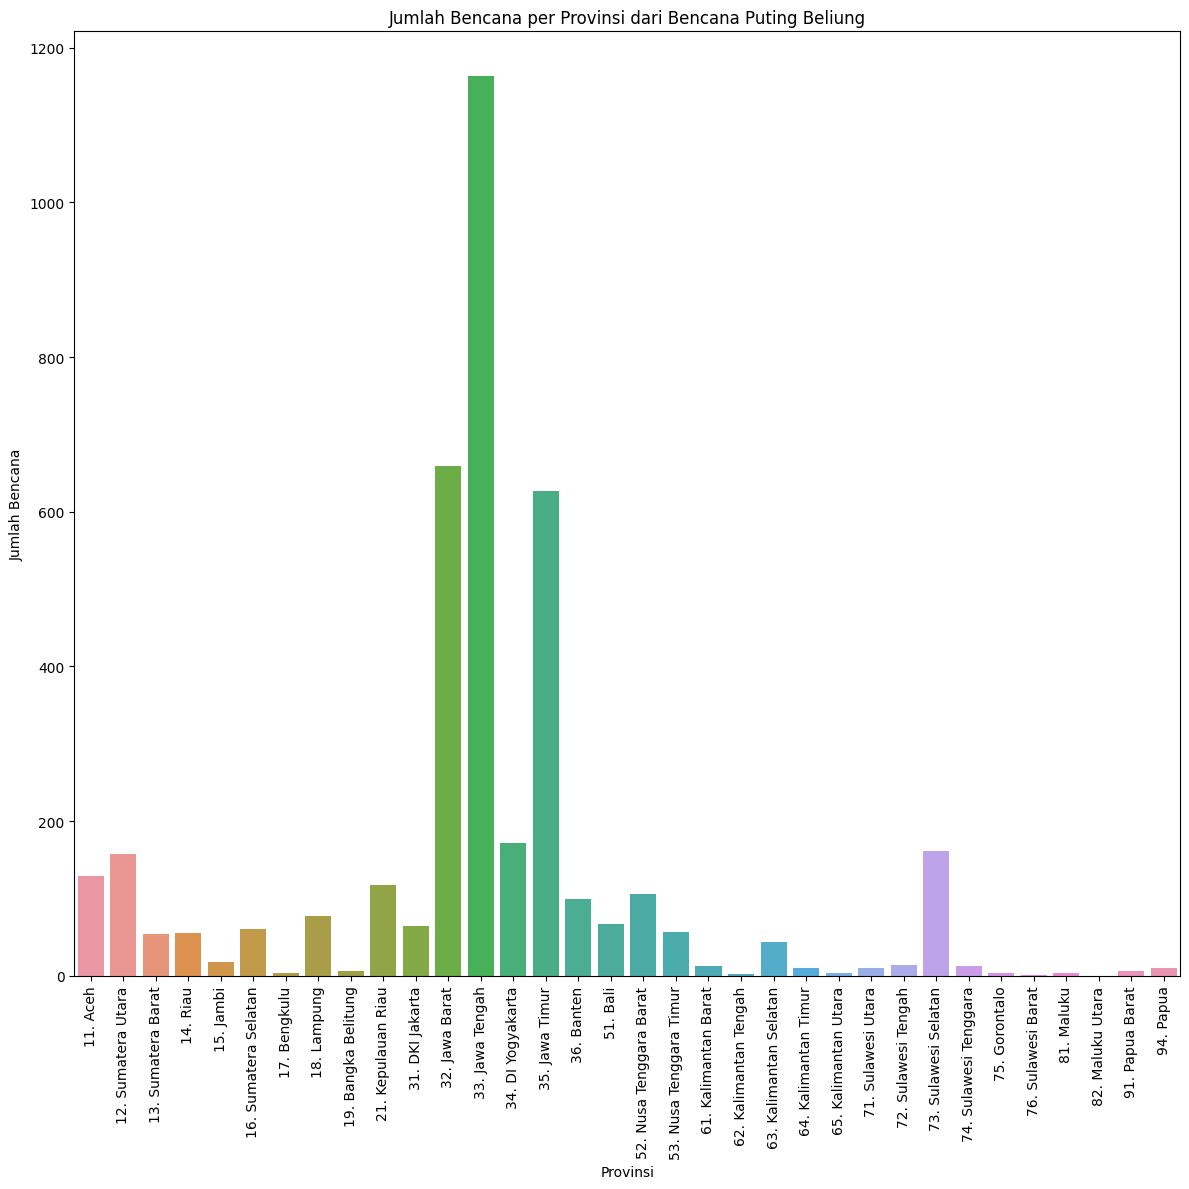

In [117]:
# Filter data hanya untuk bencana 'Banjir'
PutingBeliung_data = combined_data[combined_data['bencana'] == 'Puting Beliung']

plt.figure(figsize=(12, 12))
sns.barplot(data=PutingBeliung_data, x='provinsi', y='jumlah_bencana')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Bencana')
plt.title('Jumlah Bencana per Provinsi dari Bencana Puting Beliung')
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()

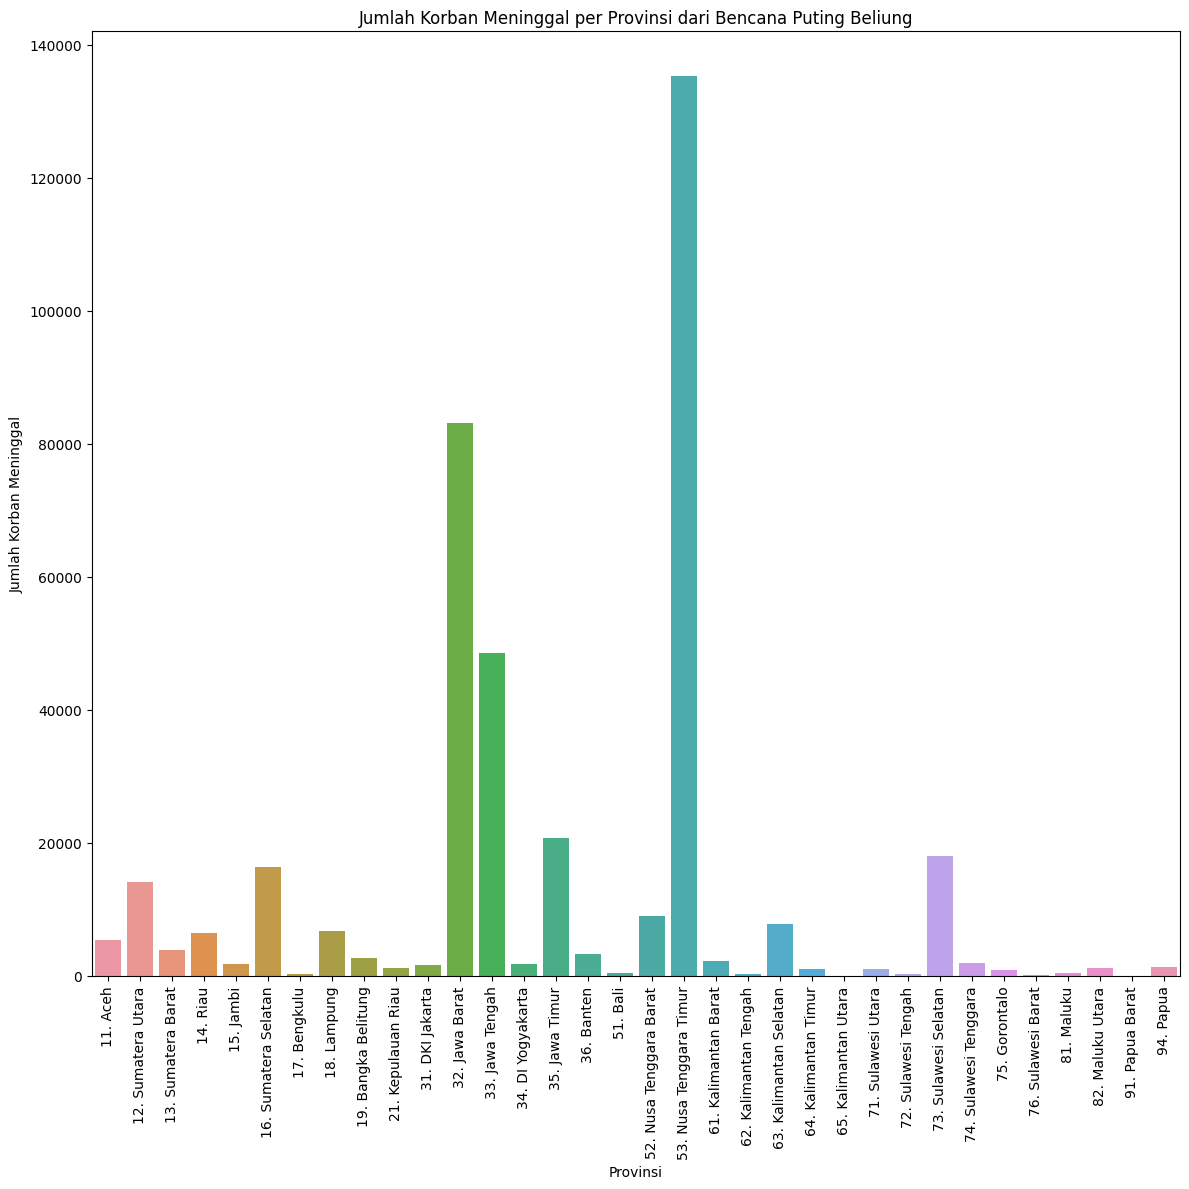

In [116]:
# Filter data hanya untuk bencana 'Banjir'
PutingBeliung_data = combined_data[combined_data['bencana'] == 'Puting Beliung']

plt.figure(figsize=(12, 12))
sns.barplot(data=PutingBeliung_data, x='provinsi', y='meninggal')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Korban Meninggal')
plt.title('Jumlah Korban Meninggal per Provinsi dari Bencana Puting Beliung')
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()

In [41]:
Data_BaruL = combined_data[combined_data['bencana'] == 'Longsor']
Data_BaruL

,provinsi,jumlah_bencana,meninggal,hilang,terluka,menderita,mengungsi,rumah,fasilitas_pendidikan,fasilitas_kesehatan,fasilitas_peribadatan,fasilitas_umum,perkantoran,bencana
0,11. Aceh,38,3545,11936,15552,605,4,0,0,0,10,0,2,Longsor
1,12. Sumatera Utara,90,2079,3678,6032,442,8,8,9,1,14,2,0,Longsor
2,13. Sumatera Barat,134,31820,7174,39448,854,11,15,0,0,37,0,4,Longsor
3,14. Riau,0,353,173,528,157,0,3,0,0,1,0,26,Longsor
4,15. Jambi,9,48,374,476,108,11,2,0,9,4,0,0,Longsor
5,16. Sumatera Selatan,16,9464,124,9655,290,3,1,24,1,12,2,0,Longsor
6,17. Bengkulu,11,483,0,541,109,1,2,0,0,9,0,1,Longsor
7,18. Lampung,163,17,731,946,126,4,3,0,1,3,0,0,Longsor
8,19. Bangka Belitung,2,0,0,28,1,0,0,0,0,0,0,0,Longsor
9,21. Kepulauan Riau,4,15,2240,2313,75,0,0,0,0,0,0,0,Longsor


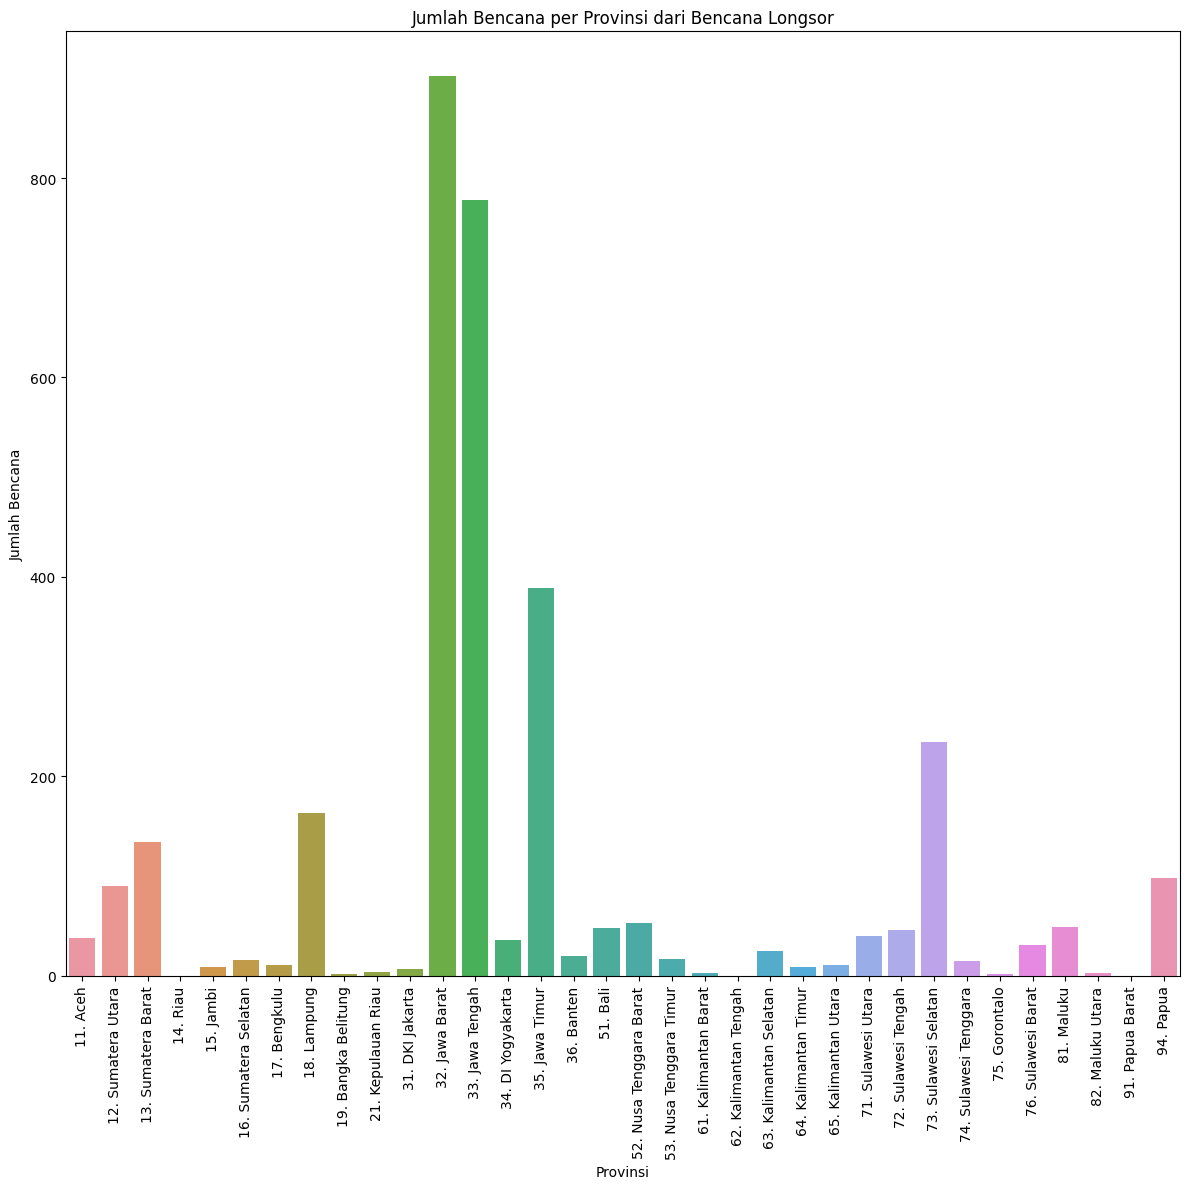

In [115]:
# Filter data hanya untuk bencana 'Banjir'
Longsor_data = combined_data[combined_data['bencana'] == 'Longsor']

plt.figure(figsize=(12, 12))
sns.barplot(data=Longsor_data, x='provinsi', y='jumlah_bencana')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Bencana')
plt.title('Jumlah Bencana per Provinsi dari Bencana Longsor')
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()

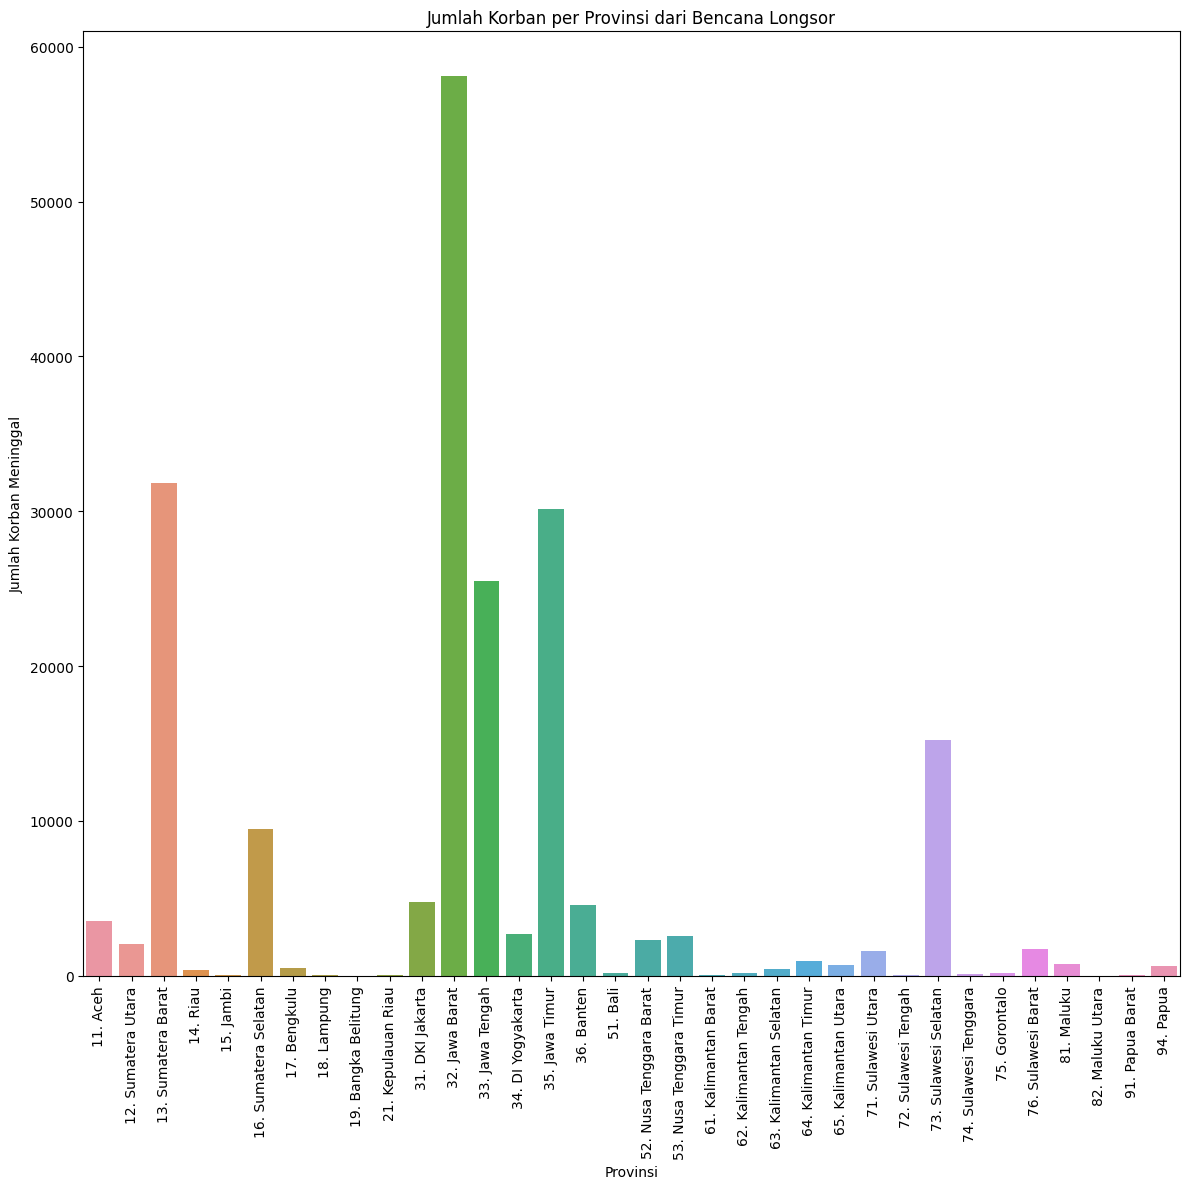

In [112]:
# Filter data hanya untuk bencana 'Banjir'
Longsor_data = combined_data[combined_data['bencana'] == 'Longsor']

plt.figure(figsize=(12, 12))
sns.barplot(data=Longsor_data, x='provinsi', y='meninggal')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Korban Meninggal')
plt.title('Jumlah Korban per Provinsi dari Bencana Longsor')
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()

In [37]:
Data_BaruT = combined_data[combined_data['bencana'] == 'Tsunami']
Data_BaruT

,provinsi,jumlah_bencana,meninggal,hilang,terluka,menderita,mengungsi,rumah,fasilitas_pendidikan,fasilitas_kesehatan,fasilitas_peribadatan,fasilitas_umum,perkantoran,bencana
0,11. Aceh,9,0,0,19,5,0,0,0,1,1,0,0,Tsunami
1,13. Sumatera Barat,498,0,15353,16355,721,6,7,0,6,0,0,0,Tsunami
2,18. Lampung,4008,0,9366,13502,1699,0,0,0,0,0,0,0,Tsunami
3,32. Jawa Barat,484,0,5840,6817,2145,8,18,0,17,6,0,0,Tsunami
4,33. Jawa Tengah,33,0,887,1107,217,0,4,0,0,38,0,120,Tsunami
5,34. DI Yogyakarta,3,0,0,6,0,0,0,0,0,0,0,0,Tsunami
6,35. Jawa Timur,0,0,0,0,0,0,0,0,0,0,0,0,Tsunami
7,36. Banten,10051,0,32959,43335,1053,3,0,0,0,0,0,88,Tsunami
8,82. Maluku Utara,0,0,0,0,0,0,0,0,0,0,0,0,Tsunami
9,94. Papua,0,0,67,68,34,0,1,0,0,3,0,0,Tsunami


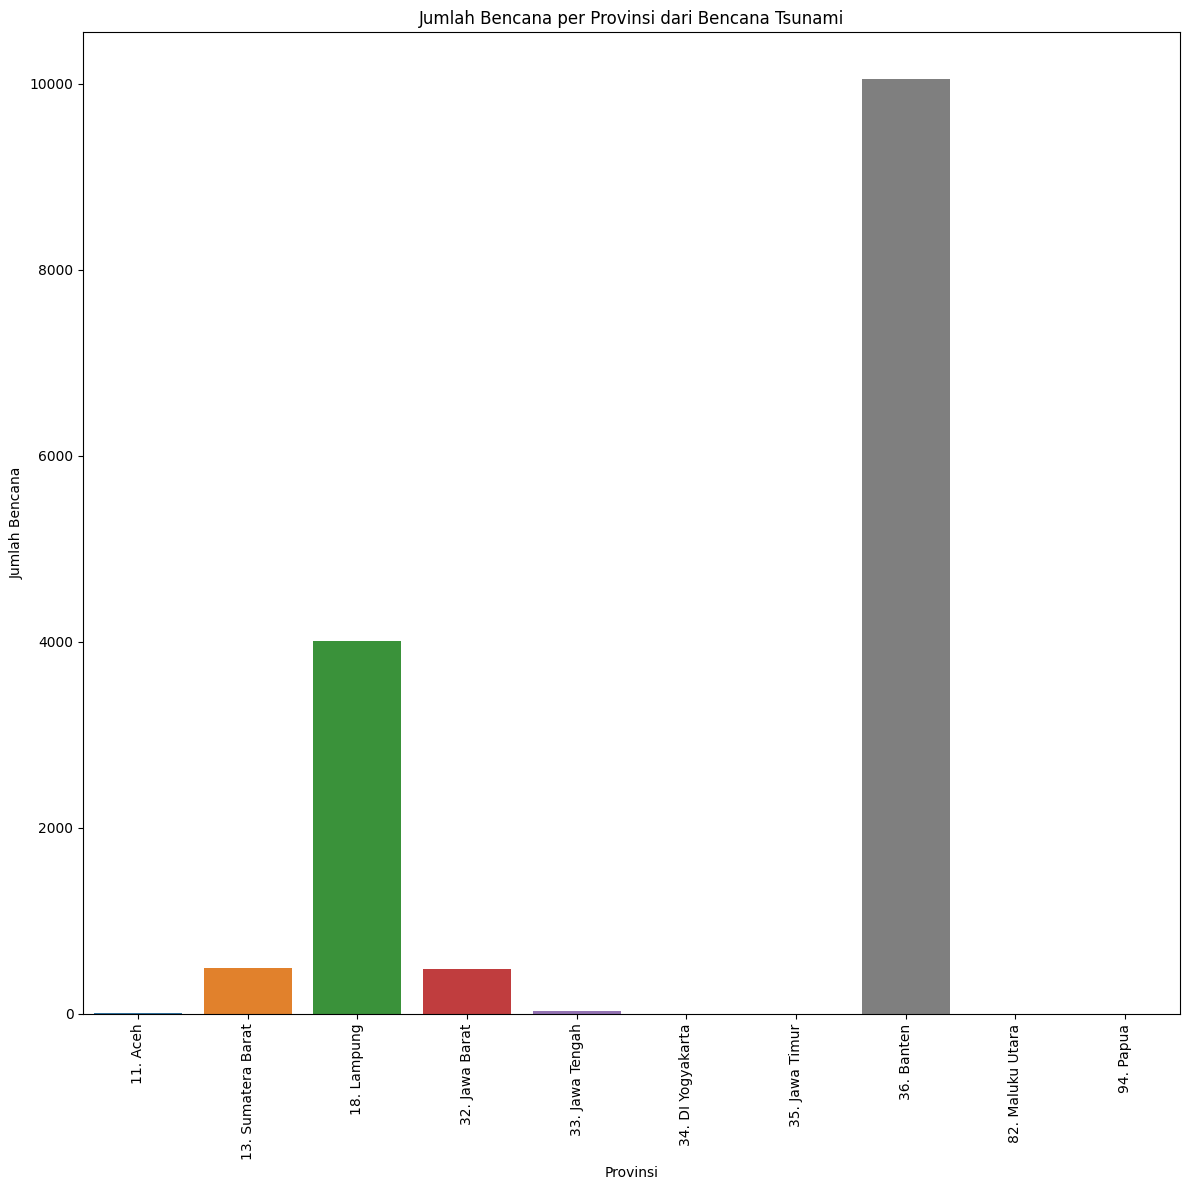

In [114]:
# Filter data hanya untuk bencana 'Banjir'
Tsunami_data = combined_data[combined_data['bencana'] == 'Tsunami']

plt.figure(figsize=(12, 12))
sns.barplot(data=Tsunami_data, x='provinsi', y='jumlah_bencana')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Bencana')
plt.title('Jumlah Bencana per Provinsi dari Bencana Tsunami')
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari barplot diatas menunjukan bahwa korban tertingi dari bencana banjir berada pada provinsi Kalimantan Selatan 

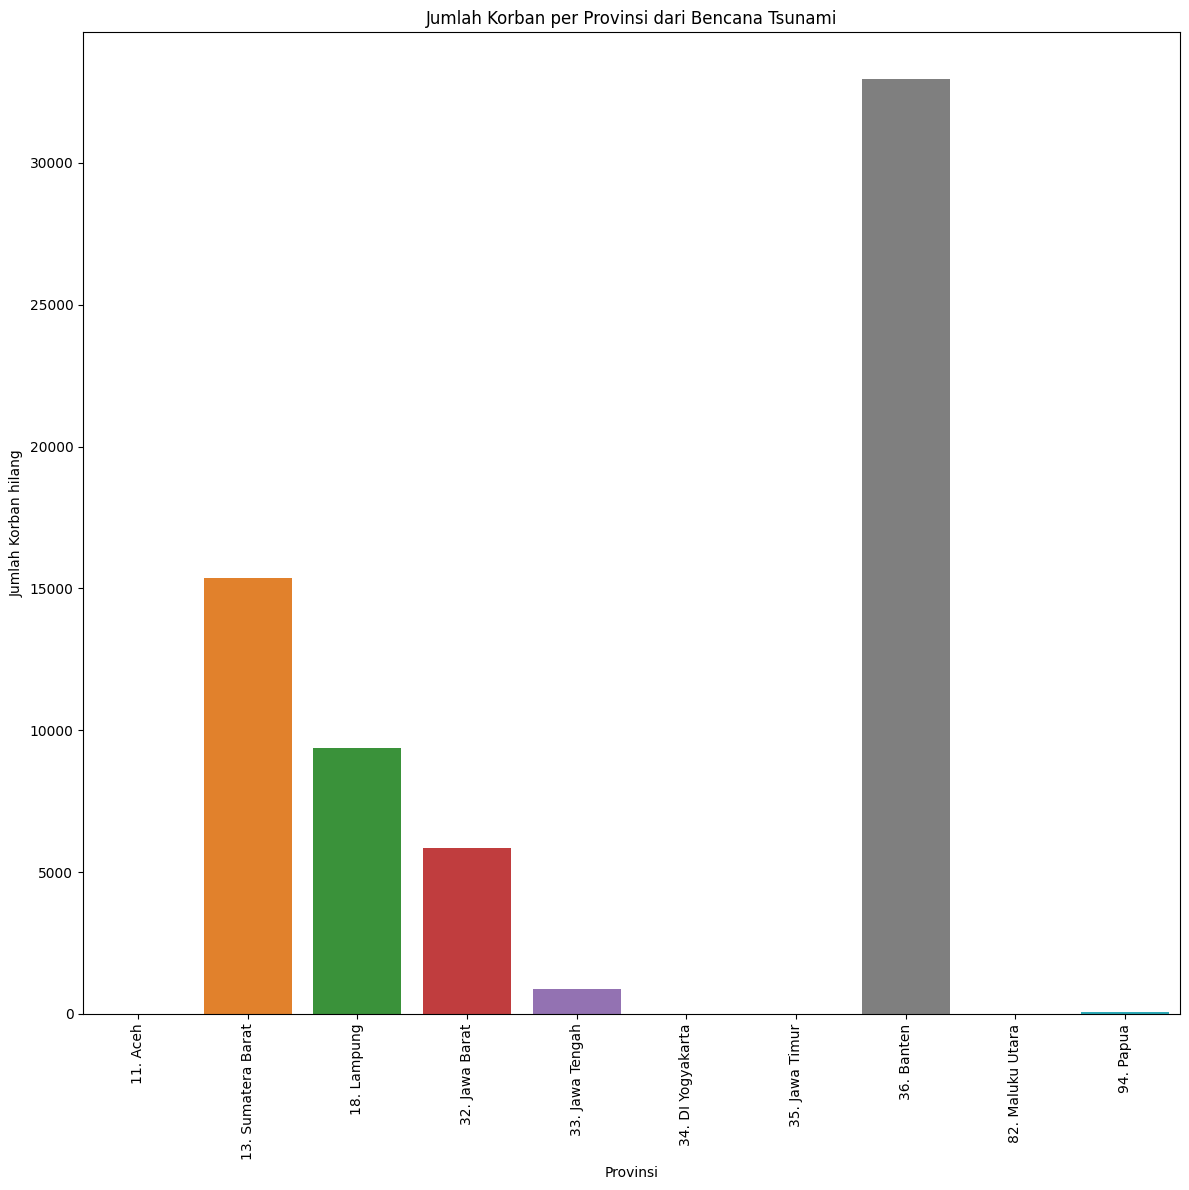

In [109]:
# Filter data hanya untuk bencana 'Banjir'
Tsunami_data = combined_data[combined_data['bencana'] == 'Tsunami']

plt.figure(figsize=(12, 12))
sns.barplot(data=Tsunami_data, x='provinsi', y='hilang')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Korban hilang')
plt.title('Jumlah Korban per Provinsi dari Bencana Tsunami')
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a9c7f1ae-e2b1-4a64-89ca-5ee7a356c3e3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>